# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 5-mar-2019 11:59 PM**

<div class="alert alert-success">
**Juan Sebastián Valbuena Silva** <br><br>
sebastian.valbuena256@gmail.com
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

Este taller tiene dos partes. Una obligatoria, relativamente fácil, y otra voluntaria y más retadora. Los invito a intentar desarrollar el taller en su totalidad.

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data).

### Parte obligatoria

### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [21.0, 12.0]
plt.style.use('ggplot')

In [14]:
crimes2015 = pd.read_csv("Crimes_-_2015.csv", parse_dates=['Date'])

In [19]:
crimes2015['Case Number'].describe().to_frame()


,Case Number
count,264076
unique,264049
top,HY346207
freq,4


In [21]:
crimes2015["Community Area"].describe().round(2)

count    264076.00
mean         37.57
std          21.42
min           0.00
25%          23.00
50%          32.00
75%          57.00
max          77.00
Name: Community Area, dtype: float64

In [17]:
crimes2015.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,2015-03-18 21:00:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


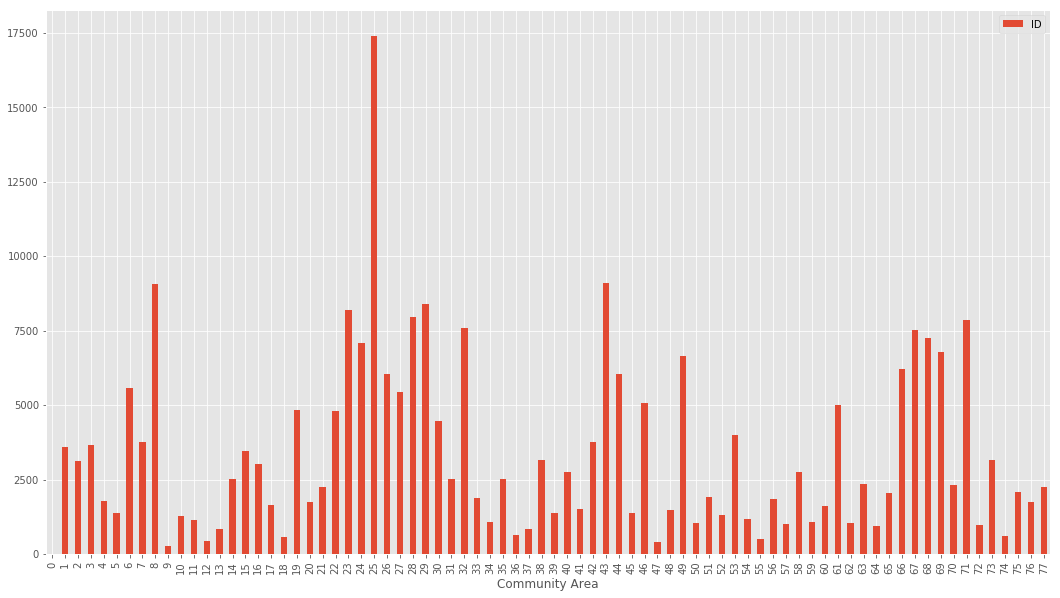

In [30]:
crimes_by_community = crimes2015.groupby('Community Area')
crimes_by_community['ID'].agg('count')


community_crime_count = crimes_by_community['ID'].agg('count')
community_crime_count.to_frame;

community_crime_count = pd.DataFrame(community_crime_count)

community_crime_count.columns

community_crime_count.plot(kind='bar');

---

### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

## descendente 


In [39]:
freq_area_2015 = pd.crosstab(index = crimes2015['Community Area'], columns = 'count')

In [40]:
freq_area_2015.sort_values(['count'], ascending = False)

col_0,count
Community Area,
25,17383
43,9099
8,9075
29,8410
23,8199
28,7948
71,7845
32,7595
67,7537


## Ascendente

In [41]:
freq_area_2015.sort_values(['count'], ascending = True)

col_0,count
Community Area,
0,2
9,258
47,389
12,450
55,516
18,587
74,618
36,632
37,842


# la mayor es la 25 y la menor la 9

In [43]:
crimes2015_updated = pd.merge(crimes2015, 
         community_crime_count, 
         left_on = 'Community Area',
        right_index = True,
        how = 'left')

---

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [46]:
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

In [47]:
crimes2015["Day"] = crimes2015["Date"].apply(to_day)

In [50]:
Fechas_2015 = pd.crosstab(index = crimes2015['Day'], columns = crimes2015["Community Area"])

In [52]:
Fechas_2015.head()
Des = Fechas_2015.describe()
Des =Des.transpose() 
Des;

In [55]:
Des[Des["mean"] < 3]

,count,mean,std,min,25%,50%,75%,max
Community Area,,,,,,,,
0,365.0,0.005479,0.073922,0.0,0.0,0.0,0.0,1.0
9,365.0,0.706849,0.860668,0.0,0.0,1.0,1.0,5.0
12,365.0,1.232877,1.175769,0.0,0.0,1.0,2.0,6.0
13,365.0,2.309589,1.593269,0.0,1.0,2.0,3.0,8.0
18,365.0,1.608219,1.248048,0.0,1.0,1.0,2.0,5.0
34,365.0,2.969863,1.868381,0.0,2.0,3.0,4.0,9.0
36,365.0,1.731507,1.417791,0.0,1.0,2.0,2.0,7.0
37,365.0,2.306849,1.550995,0.0,1.0,2.0,3.0,7.0
47,365.0,1.065753,1.170167,0.0,0.0,1.0,2.0,6.0


In [56]:
Fechas_2015.head()

Community Area,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,17,13,15,6,5,25,15,48,1,...,30,30,9,53,3,10,2,8,7,9
2015-01-02,0,5,9,8,3,2,10,9,27,0,...,12,22,6,17,1,11,1,3,6,5
2015-01-03,0,7,11,9,7,4,6,11,27,1,...,23,12,8,18,0,8,1,7,3,3
2015-01-04,0,12,7,9,10,3,15,5,16,1,...,13,15,9,12,1,5,0,1,6,1
2015-01-05,0,6,7,5,4,5,15,7,11,1,...,16,12,8,17,0,5,2,2,7,5


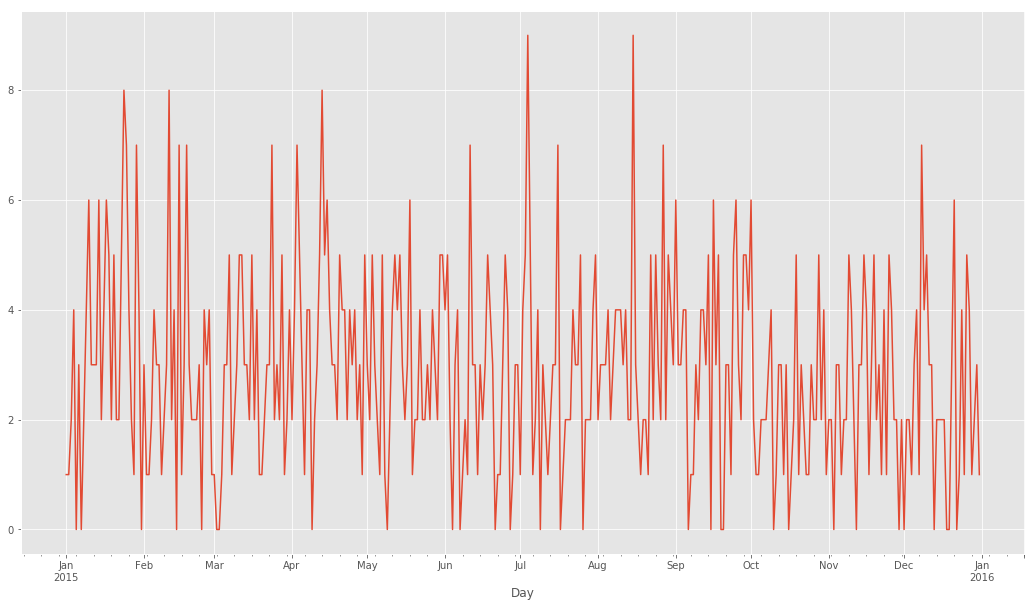

In [70]:
Fechas_2015[50].plot(kind="line");

---

### Parte voluntaria

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

### 4.
Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.

---